<a href="https://colab.research.google.com/github/ricospeloacaso/python_para_investimentos/blob/master/06_Simulando_Carteiras_de_A%C3%A7%C3%B5es_Aleat%C3%B3rias_Python_para_Investimentos_com_Google_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ricos pelo Acaso

Link para o vídeo: https://youtu.be/G2Tr2dcjR3U

# 1. Importando Bibliotecas


In [1]:
# Configurando Yahoo Finance
#!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import random

# 2. Obtendo e tratando os dados 

In [3]:
tickers_ibov = "ABEV3.SA AZUL4.SA B3SA3.SA BBAS3.SA BBDC3.SA BBDC4.SA BBSE3.SA BPAC11.SA BRAP4.SA BRDT3.SA BRFS3.SA BRKM5.SA BTOW3.SA CCRO3.SA CIEL3.SA CMIG4.SA COGN3.SA CRFB3.SA CSAN3.SA CSNA3.SA CVCB3.SA CYRE3.SA ECOR3.SA EGIE3.SA ELET3.SA ELET6.SA EMBR3.SA EQTL3.SA FLRY3.SA GGBR4.SA GOAU4.SA GOLL4.SA HAPV3.SA HYPE3.SA IRBR3.SA ITSA4.SA ITUB4.SA JBSS3.SA KLBN11.SA LAME4.SA LREN3.SA MGLU3.SA MRFG3.SA MRVE3.SA MULT3.SA NTCO3.SA PCAR4.SA PETR3.SA PETR4.SA QUAL3.SA RADL3.SA RAIL3.SA RENT3.SA SANB11.SA SBSP3.SA SMLS3.SA SUZB3.SA TAEE11.SA TOTS3.SA UGPA3.SA USIM5.SA VALE3.SA WEGE3.SA YDUQ3.SA"

dados_yahoo = yf.download(tickers=tickers_ibov, period='1y')["Close"]

ibov = yf.download('BOVA11.SA', period='1y')["Close"]
ibov = ibov / ibov.iloc[0]

[*********************100%%**********************]  72 of 73 completed

14 Failed downloads:
[*********************100%%**********************]  72 of 73 completed['ENBR3.SA', 'BRML3.SA', 'VIVT4.SA', 'HGTX3.SA', 'SULA11.SA', 'GNDI3.SA', 'SMLS3.SA', 'LAME4.SA', 'PCAR4.SA', 'BRDT3.SA', 'IGTA3.SA', 'VVAR3.SA', 'TIMP3.SA', 'BTOW3.SA']: YFChartError('%ticker%: No data found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


In [4]:
dados_yahoo.dropna(how='all', inplace=True)
dados_yahoo.dropna(axis=1, inplace=True, thresh=246)

In [5]:
dados_yahoo

Ticker,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BPAC11.SA,BRAP4.SA,BRFS3.SA,...,SANB11.SA,SBSP3.SA,SUZB3.SA,TAEE11.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2023-06-19,14.359434,21.420000,14.315548,23.619934,14.013329,16.306309,27.704224,29.241266,21.316130,9.250000,...,29.249737,53.637699,46.609982,34.115192,29.571024,17.425304,7.249949,63.849274,36.967152,18.437422
2023-06-20,14.387944,21.590000,14.247839,23.615248,14.032215,16.344120,27.685905,29.964478,20.983768,9.700000,...,29.221405,54.472870,46.355919,34.133240,29.511864,17.687998,7.143616,62.202442,36.260586,18.883801
2023-06-21,14.520989,21.760000,14.160786,24.360254,14.136088,16.306309,27.786650,30.326086,20.849026,9.510000,...,29.561407,54.630077,45.417858,34.151279,29.087872,17.833937,7.056617,61.576828,35.769917,19.747450
2023-06-22,14.777578,21.190001,13.735188,23.896379,13.881128,15.880929,27.832441,29.495367,20.606493,9.360000,...,29.004181,53.647522,44.812027,33.907669,28.565273,17.619892,6.979284,61.245625,35.720852,19.436924
2023-06-23,14.720558,21.240000,13.957660,23.905752,13.843355,15.682417,28.015610,29.641964,20.507681,9.500000,...,29.004181,54.787289,44.890198,34.331741,29.354097,17.619892,6.988951,60.629215,35.917114,17.884300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-11,11.400000,9.550000,10.550000,26.845276,11.540000,12.930000,32.779999,32.230000,18.370001,19.000000,...,27.090000,75.599998,48.919998,33.790001,29.100000,22.730000,7.130000,60.980000,37.799999,11.490000
2024-06-12,11.270000,9.300000,10.400000,26.337137,11.310000,12.690000,32.470001,31.690001,18.160000,18.780001,...,27.040001,73.160004,49.000000,33.419998,29.000000,21.830000,7.050000,60.139999,38.070000,11.350000
2024-06-13,11.090000,9.200000,10.080000,26.515760,11.280000,12.700000,32.509998,31.879999,18.240000,18.600000,...,27.000000,74.470001,48.770000,33.349998,29.590000,21.709999,7.160000,60.830002,38.419998,11.300000


In [6]:
retorno = dados_yahoo.pct_change()
retorno

Ticker,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BPAC11.SA,BRAP4.SA,BRFS3.SA,...,SANB11.SA,SBSP3.SA,SUZB3.SA,TAEE11.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2023-06-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-20,0.001985,0.007937,-0.004730,-0.000198,0.001348,0.002319,-0.000661,0.024733,-0.015592,0.048649,...,-0.000969,0.015571,-0.005451,0.000529,-0.002001,0.015075,-0.014667,-0.025792,-0.019113,0.024210
2023-06-21,0.009247,0.007874,-0.006110,0.031548,0.007402,-0.002313,0.003639,0.012068,-0.006421,-0.019588,...,0.011635,0.002886,-0.020236,0.000529,-0.014367,0.008251,-0.012179,-0.010058,-0.013532,0.045735
2023-06-22,0.017670,-0.026195,-0.030055,-0.019042,-0.018036,-0.026087,0.001648,-0.027393,-0.011633,-0.015773,...,-0.018850,-0.017986,-0.013339,-0.007133,-0.017966,-0.012002,-0.010959,-0.005379,-0.001372,-0.015725
2023-06-23,-0.003859,0.002360,0.016197,0.000392,-0.002721,-0.012500,0.006581,0.004970,-0.004795,0.014957,...,0.000000,0.021245,0.001744,0.012507,0.027615,0.000000,0.001385,-0.010065,0.005494,-0.079880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-11,-0.005236,0.040305,0.005720,0.011025,0.004352,0.005443,0.004905,0.019937,0.001636,0.033170,...,0.003333,0.006658,-0.015496,0.007754,0.019622,0.009773,0.011348,-0.001474,-0.000265,0.027728
2024-06-12,-0.011403,-0.026178,-0.014218,-0.018928,-0.019931,-0.018562,-0.009457,-0.016755,-0.011432,-0.011579,...,-0.001846,-0.032275,0.001635,-0.010950,-0.003436,-0.039595,-0.011220,-0.013775,0.007143,-0.012184
2024-06-13,-0.015972,-0.010753,-0.030769,0.006782,-0.002653,0.000788,0.001232,0.005996,0.004405,-0.009585,...,-0.001479,0.017906,-0.004694,-0.002095,0.020345,-0.005497,0.015603,0.011473,0.009194,-0.004405


In [7]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

Ticker,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BPAC11.SA,BRAP4.SA,BRFS3.SA,...,SANB11.SA,SBSP3.SA,SUZB3.SA,TAEE11.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2023-06-19,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2023-06-20,1.001985,1.007937,0.995270,0.999802,1.001348,1.002319,0.999339,1.024733,0.984408,1.048649,...,0.999031,1.015571,0.994549,1.000529,0.997999,1.015075,0.985333,0.974208,0.980887,1.024210
2023-06-21,1.011251,1.015873,0.989189,1.031343,1.008760,1.000000,1.002975,1.037099,0.978087,1.028108,...,1.010655,1.018502,0.974423,1.001058,0.983661,1.023451,0.973333,0.964409,0.967614,1.071053
2023-06-22,1.029120,0.989262,0.959459,1.011704,0.990566,0.973913,1.004628,1.008690,0.966709,1.011892,...,0.991605,1.000183,0.961426,0.993917,0.965989,1.011167,0.962667,0.959222,0.966286,1.054211
2023-06-23,1.025149,0.991597,0.975000,1.012101,0.987871,0.961739,1.011240,1.013703,0.962073,1.027027,...,0.991605,1.021432,0.963103,1.006348,0.992664,1.011167,0.964000,0.949568,0.971595,0.970000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-11,0.793903,0.445845,0.736961,1.136552,0.823502,0.792945,1.183213,1.102209,0.861789,2.054054,...,0.926162,1.409456,1.049561,0.990468,0.984071,1.304425,0.983455,0.955062,1.022529,0.623189
2024-06-12,0.784850,0.434174,0.726483,1.115039,0.807089,0.778226,1.172024,1.083742,0.851937,2.030270,...,0.924453,1.363966,1.051277,0.979622,0.980690,1.252776,0.972421,0.941906,1.029833,0.615596
2024-06-13,0.772315,0.429505,0.704130,1.122601,0.804948,0.778840,1.173467,1.090240,0.855690,2.010811,...,0.923085,1.388389,1.046342,0.977570,1.000642,1.245889,0.987593,0.952713,1.039301,0.612884


# 3. Resultados

In [8]:
carteira = random.sample(list(dados_yahoo.columns) , k=5)
carteira = 10000 * retorno_acumulado.loc[: , carteira]
carteira['saldo'] = carteira.sum(axis=1)
carteira["retorno"] = carteira['saldo'].pct_change()
carteira

Ticker,TAEE11.SA,CYRE3.SA,CSNA3.SA,B3SA3.SA,SUZB3.SA,saldo,retorno
Date,,,,,,,
2023-06-19,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,50000.000000,NaN
2023-06-20,10005.290116,9927.946608,9776.452974,9952.702496,9945.491793,49607.883987,-0.007842
2023-06-21,10010.577996,10211.013871,9731.744197,9891.892180,9744.234309,49589.462553,-0.000371
2023-06-22,9939.169815,9866.186851,9582.712847,9594.594343,9614.255466,48596.919322,-0.020015
2023-06-23,10063.475802,10138.960479,9560.358066,9750.000333,9631.026719,49143.821399,0.011254
...,...,...,...,...,...,...,...
2024-06-11,9904.678393,10501.153457,10117.512161,7369.609765,10495.605567,48388.559342,0.000118
2024-06-12,9796.221509,10189.291297,9804.684188,7264.828185,10512.769665,47567.794844,-0.016962
2024-06-13,9775.702880,10205.421444,9796.451687,7041.295215,10463.424110,47282.295337,-0.006002


<Axes: xlabel='Date'>

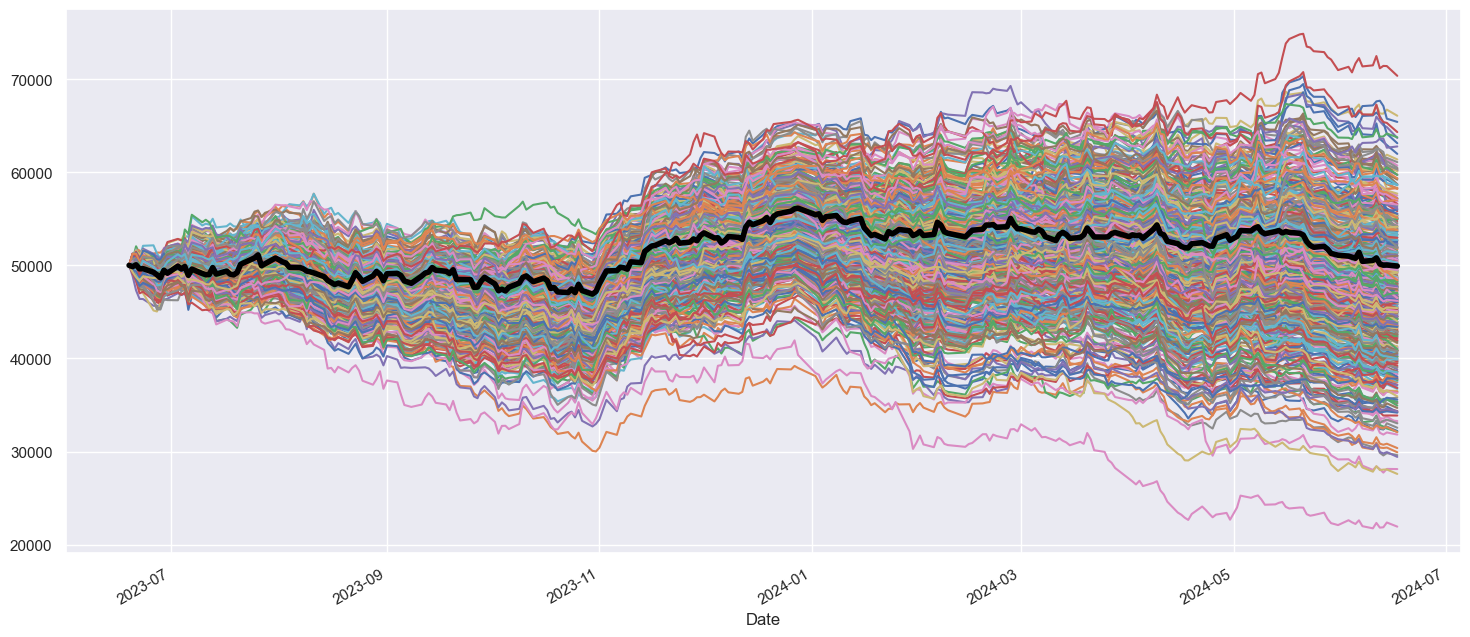

In [9]:
# 500 carteiras de 5 ações cada escolhidas aleatoriamente baseadas nos dados 
for i in range(500):
  carteira = random.sample(list(dados_yahoo.columns) , k=5)
  carteira = 10000 * retorno_acumulado.loc[: , carteira]
  carteira['saldo'] = carteira.sum(axis=1)
  carteira['saldo'].plot(figsize=(18,8))

(ibov*50000).plot(linewidth=4, color='black')
  